<a href="https://colab.research.google.com/github/sparsh2401/Weather-Prediction/blob/main/weather_project(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
categorical_cols = df.select_dtypes(include=['object','bool']).columns

NameError: name 'df' is not defined

In [ ]:
print("Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


Data Types:
 Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover               int64
Atmospheric Pressure    float64
UV Index                  int64
Season                    int64
Visibility (km)         float64
Location                  int64
Weather Type              int64
dtype: object

Missing Values:
 Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

Unique Values in Categorical Columns:


In [ ]:
df[categorical_cols] = df[categorical_cols].fillna("Unknown").astype(str)


In [ ]:
df[categorical_cols]

""
0
1
2
3
4
...
13195
13196
13197
13198


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Load dataset (replace this with actual dataset)
df = pd.read_csv("weather_classification_data.csv")

# Define features and target
X = df.drop(columns=["Weather Type"], errors='ignore')
y = df["Weather Type"]

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Identifying categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype != 'object']

# Column transformer to handle different data types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Define XGBoost classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="mlogloss")

# Create a pipeline to ensure proper data transformation
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb)
])

# Medium-Level Hyperparameter Tuning with GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model after Tuning
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions
preds = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, preds)
print("Model accuracy:", accuracy)

# Fix: Convert `label_encoder.classes_` to string
target_names = [str(cls) for cls in label_encoder.classes_]

# Classification Report
report = classification_report(y_test, preds, target_names=target_names)
print("Classification Report:\n", report)

# Extract feature names correctly
preprocessor.fit(X_train)  # Ensure it's fitted before accessing feature names
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Get feature importances
feature_importances = best_model.named_steps['classifier'].feature_importances_

# Extract top 5 features
top_5_idx = np.argsort(feature_importances)[-5:]
top_5_features = np.array(feature_names)[top_5_idx]
top_5_importances = feature_importances[top_5_idx]

# Display top 5 features
print("Top 5 Features:")
for feature, importance in zip(top_5_features[::-1], top_5_importances[::-1]):
    print(f"{feature}: {importance:.4f}")

# Plot top 5 feature importances
plt.figure(figsize=(8, 6))
plt.barh(top_5_features, top_5_importances, color="skyblue")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 5 Feature Importances')
plt.show()

# Save the best model
with open('weather_xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print("Model saved as weather_xgboost_model.pkl")


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}


AttributeError: 'super' object has no attribute '__sklearn_tags__'

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:33:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Model Accuracy: 91.33%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       651
           1       0.90      0.91      0.91       647
           2       0.92      0.95      0.94       701
           3       0.94      0.90      0.92       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



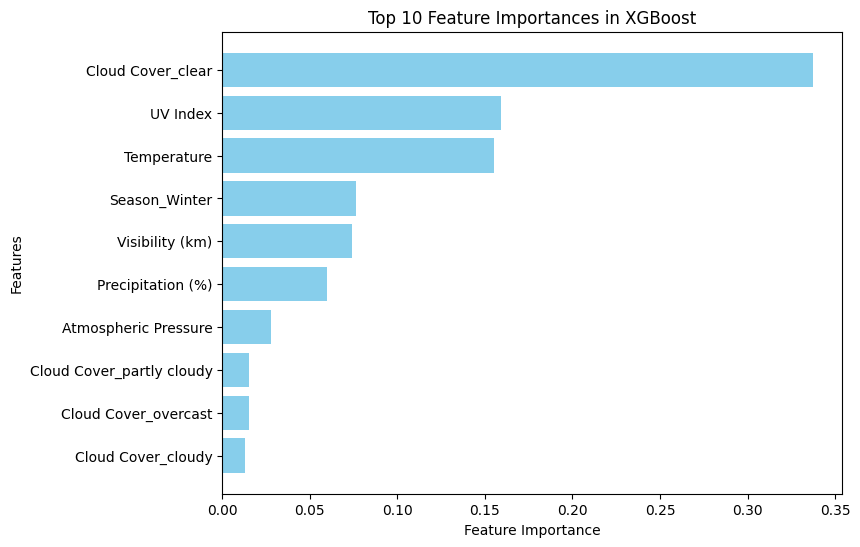

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode target variable (assuming classification task)
label_encoder = LabelEncoder()
df["Weather Type"] = label_encoder.fit_transform(df["Weather Type"])

# Separate features and target
X = df.drop("Weather Type", axis=1)
y = df["Weather Type"]

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

# Define preprocessing steps
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Split dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define hyperparameter grid for tuning XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'subsample': [0.8, 1.0],  # Fraction of samples used for training
    'colsample_bytree': [0.8, 1.0]  # Fraction of features used per tree
}

# Initialize XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="mlogloss")

# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1
)
grid_search.fit(X_train, y_train)

# Best model after tuning
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance visualization
import matplotlib.pyplot as plt

feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
feature_importances = best_model.feature_importances_

# Sort feature importance
sorted_idx = np.argsort(feature_importances)[-10:]  # Top 10 important features

plt.figure(figsize=(8, 6))
plt.barh(np.array(feature_names)[sorted_idx], feature_importances[sorted_idx], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Feature Importances in XGBoost")
plt.show()


In [ ]:
import pandas as pd
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 🔹 Load dataset
df = pd.read_csv('weather_classification_data.csv')

# 🔹 Define relevant columns
numerical_cols = ['Wind Speed', 'Temperature', 'UV Index', 'Precipitation (%)',
                  'Atmospheric Pressure', 'Visibility (km)', 'Humidity']
categorical_cols = ['Location', 'Season', 'Cloud Cover']

# 🔹 Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardizing numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encoding categorical features
    ]
)

# 🔹 Fit the preprocessor on the dataset
preprocessor.fit(df[numerical_cols + categorical_cols])

# 🔹 Save preprocessor as a pickle file
with open('/mnt/data/preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

print("✅ Preprocessor saved successfully as preprocessor.pkl")


FileNotFoundError: [Errno 2] No such file or directory: 'weather_classification_data.csv'

In [ ]:
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define new preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ["numerical_col_1", "numerical_col_2"]),  # Replace with your actual numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), ["categorical_col_1", "categorical_col_2"])  # Replace with your actual categorical columns
    ]
)

# Save preprocessor again
with open("preprocessor.pkl", "wb") as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file, protocol=5)  # Protocol 5 improves compatibility


In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import pickle

# Load dataset
df = pd.read_csv("weather_classification_data.csv")

# Define numerical & categorical features
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype != 'object']

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ]
)

# Fit the preprocessor
X = df.drop(columns=["Weather Type"])  # Drop target column
preprocessor.fit(X)

# Save the preprocessor again
with open("preprocessor.pkl", "wb") as file:
    pickle.dump(preprocessor, file)

print("✅ New preprocessor saved successfully!")


✅ New preprocessor saved successfully!


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("weather_classification_data.csv")

# Encode categorical features
label_encoders = {}
categorical_cols = ["Cloud Cover", "Season", "Location", "Weather Type"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=["Weather Type"])
y = df["Weather Type"]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naïve Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print accuracy of each model
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:33:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression: 0.8545
Decision Tree: 0.9057
Random Forest: 0.9155
SVM: 0.9083
KNN: 0.8992
Naïve Bayes: 0.8614
XGBoost: 0.9155


In [ ]:
import pickle
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Ensure column names are correct
print("Columns in dataset:", df.columns)

# Define features and target
X = df.drop(columns=["Weather Type"], errors='ignore')
y = df["Weather Type"]

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identifying the categorical and numerical columns
categorical_cols = [col for col in X.columns if df[col].dtype == 'object']
numerical_cols = [col for col in X.columns if df[col].dtype != 'object']

# Column transformer to handle different data types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Defining pipelines for different models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Training and evaluating models
for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))


    with open(f'{name.replace(" ", "_").lower()}_model.pkl', 'wb') as file:
        pickle.dump(pipeline, file)

print("Models saved successfully.")


Columns in dataset: Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       955
           1       0.84      0.85      0.85       982
           2       0.88      0.94      0.91      1033
           3       0.87      0.79      0.83       990

    accuracy                           0.85      3960
   macro avg       0.85      0.85      0.85      3960
weighted avg       0.85      0.85      0.85      3960

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       955
           1       0.90      0.91      0.91       982
           2       0.92      0.94      0.93      1033
           3       0.95      0.90 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:33:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       955
           1       0.90      0.90      0.90       982
           2       0.93      0.94      0.94      1033
           3       0.95      0.91      0.93       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960

Models saved successfully.


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Print dataset columns for debugging
print("Columns in dataset:", df.columns)

# Define features (X) and target (y)
X = df.drop(columns=["Weather Type"], errors='ignore')  # Drop target column
y = df["Weather Type"]

# Identify categorical and numerical columns
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype != 'object']

# Define the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical features
    ]
)

# Fit the preprocessor on data
preprocessor.fit(X)

# Transform the dataset
X_transformed = preprocessor.transform(X)

# Convert to DataFrame for easy viewing
import numpy as np
transformed_feature_names = (
    numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
)
X_transformed_df = pd.DataFrame(X_transformed, columns=transformed_feature_names)

# Print first 5 rows of transformed data
print(X_transformed_df.head())

# Save the preprocessor for later use
import pickle
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

print("Preprocessor saved as preprocessor.pkl")


Columns in dataset: Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')


NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
print(preprocessor.get_feature_names_out())


['num__Temperature' 'num__Humidity' 'num__Wind Speed'
 'num__Precipitation (%)' 'num__Atmospheric Pressure' 'num__UV Index'
 'num__Visibility (km)' 'cat__Cloud Cover_clear' 'cat__Cloud Cover_cloudy'
 'cat__Cloud Cover_overcast' 'cat__Cloud Cover_partly cloudy'
 'cat__Season_Autumn' 'cat__Season_Spring' 'cat__Season_Summer'
 'cat__Season_Winter' 'cat__Location_coastal' 'cat__Location_inland'
 'cat__Location_mountain']


In [ ]:
X.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location'],
      dtype='object')

In [ ]:
expected_features = preprocessor.get_feature_names_out()
X = X[expected_features]  # Keep only the required columns


KeyError: "None of [Index(['num__Temperature', 'num__Humidity', 'num__Wind Speed',\n       'num__Precipitation (%)', 'num__Atmospheric Pressure', 'num__UV Index',\n       'num__Visibility (km)', 'cat__Cloud Cover_clear',\n       'cat__Cloud Cover_cloudy', 'cat__Cloud Cover_overcast',\n       'cat__Cloud Cover_partly cloudy', 'cat__Season_Autumn',\n       'cat__Season_Spring', 'cat__Season_Summer', 'cat__Season_Winter',\n       'cat__Location_coastal', 'cat__Location_inland',\n       'cat__Location_mountain'],\n      dtype='object')] are in the [columns]"